In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load the asteroid data
file_path = 'Asteroid_Data.csv'
asteroid_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
asteroid_data.head(10)

,full_name,spec_B,spec_T,spkid,pdes,name,prefix,neo,pha,sats,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
0,433 Eros (A898 PA),S,S,20000433,433,Eros,NaN,Y,N,0,...,0.29796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,719 Albert (A911 TB),S,NaN,20000719,719,Albert,NaN,Y,N,0,...,0.40669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,887 Alinda (A918 AA),NaN,S,20000887,887,Alinda,NaN,Y,N,0,...,0.42729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1036 Ganymed (A924 UB),S,S,20001036,1036,Ganymed,NaN,Y,N,0,...,0.32105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1221 Amor (1932 EA1),NaN,NaN,20001221,1221,Amor,NaN,Y,N,0,...,0.45197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1566 Icarus (1949 MA),NaN,NaN,20001566,1566,Icarus,NaN,Y,Y,0,...,0.37282,NaN,NaN,NaN,-3.600000e-15,2.900000e-16,NaN,NaN,NaN,NaN
6,1580 Betulia (1950 KA),NaN,C,20001580,1580,Betulia,NaN,Y,N,0,...,0.51512,NaN,NaN,NaN,-3.000000e-15,4.900000e-16,NaN,NaN,NaN,NaN
7,1620 Geographos (1951 RA),S,S,20001620,1620,Geographos,NaN,Y,Y,0,...,0.29384,NaN,NaN,NaN,-3.700000e-15,2.400000e-16,NaN,NaN,NaN,NaN
8,1627 Ivar (1929 SH),S,S,20001627,1627,Ivar,NaN,Y,N,0,...,0.28190,NaN,NaN,NaN,1.700000e-15,3.700000e-16,NaN,NaN,NaN,NaN
9,1685 Toro (1948 OA),S,S,20001685,1685,Toro,NaN,Y,N,0,...,0.32377,NaN,NaN,NaN,-2.300000e-15,2.300000e-16,NaN,NaN,NaN,NaN


The asteroid dataset contains several key features related to each asteroid, including:

    name: The asteroid's name.
    a: Semi-major axis (AU).
    e: Eccentricity (orbital).
    i: Inclination (degrees).
    om: Longitude of ascending node (degrees).
    w: Argument of perihelion (degrees).
    q: Perihelion distance (AU).
    ad: Aphelion distance (AU).
    per_y: Orbital period (years).
    diameter:  Diameter (km)
    data_arc: Data arc span (days).
    UB: UV brightness.
    spec_B and spec_T: Spectral types.
    G: Slope parameter.
    moid: Minimum Orbit Intersection Distance (AU).
    class: Classification (e.g., MBA for Main Belt Asteroid).
    n: Mean motion (degrees/day).
    per: Orbital period (days).
    ma: Mean anomaly (degrees).

Next, let's explore specific characteristics for some key parameters:

1.  Orbital Period (per_y): How long it takes for asteroids to complete an orbit around the Sun.
2.  Eccentricity (e): This shows how elliptical (versus circular) the orbits are.
3.  Inclination (i): The tilt of the asteroid's orbit relative to the plane of the Solar System.
4.  Diameter (diameter):  The diameter of the asteroid.


In [38]:
# We now analyze and visualize the characteristics by generating summary statistics and visualizations for these parameters
# Summary statistics for the key parameters

# Step 1: Check for missing values in the relevant columns
missing_values = asteroid_data[['per_y', 'e', 'i', 'diameter']].isnull().sum()

# Step 2: Check the data types of these columns
data_types = asteroid_data[['per_y', 'e', 'i', 'diameter']].dtypes

print(missing_values, data_types)

# Drop rows where 'per_y', 'e', or 'i' are either missing or set to zero
asteroid_data_cleaned = asteroid_data.dropna(subset=['per_y', 'e', 'i'])

# Further remove rows where any of the selected columns are zero
asteroid_data_cleaned = asteroid_data_cleaned[(asteroid_data_cleaned['per_y'] != 0) &
                                              (asteroid_data_cleaned['e'] != 0) &
                                              (asteroid_data_cleaned['i'] != 0)]

# Clean data for diameter analysis
asteroid_data_cleaned_diameter = asteroid_data.dropna(subset=['diameter'])
# Further remove rows where any of the selected columns are zero
asteroid_data_cleaned_diameter = asteroid_data_cleaned_diameter[(asteroid_data_cleaned_diameter['diameter'] != 0)]

# Check the cleaned dataset
print(asteroid_data_cleaned[['per_y', 'e', 'i']].isnull().sum())
print((asteroid_data_cleaned[['per_y', 'e', 'i']] == 0).sum())

summary_stats = asteroid_data_cleaned[['per_y', 'e', 'i']].describe()
print("Before cleaning up diameter column")
print(summary_stats)
print()
print("After cleaning up diameter column")
summary_stats = asteroid_data_cleaned_diameter[['per_y', 'e', 'i','diameter']].describe()
print(summary_stats)



per_y          0
e              0
i              0
diameter    2516
dtype: int64 per_y       float64
e           float64
i           float64
diameter    float64
dtype: object
per_y    0
e        0
i        0
dtype: int64
per_y    0
e        0
i        0
dtype: int64
Before cleaning up diameter column
             per_y            e            i
count  3292.000000  3292.000000  3292.000000
mean      2.377188     0.465143    18.127132
std       1.130953     0.176332    13.280602
min       0.414000     0.028100     0.150000
25%       1.500000     0.337200     7.785000
50%       2.170000     0.465900    15.025000
75%       3.130000     0.581125    25.077500
max       8.810000     0.968500   154.350000

After cleaning up diameter column
            per_y           e           i    diameter
count  776.000000  776.000000  776.000000  776.000000
mean     2.371322    0.479852   19.528273    1.388415
std      1.229000    0.175689   13.130411    1.974395
min      0.496000    0.030100    0.340000 

The rest of the analysis will focus on interesting aspects of asteroids within or near Earth's orbit 

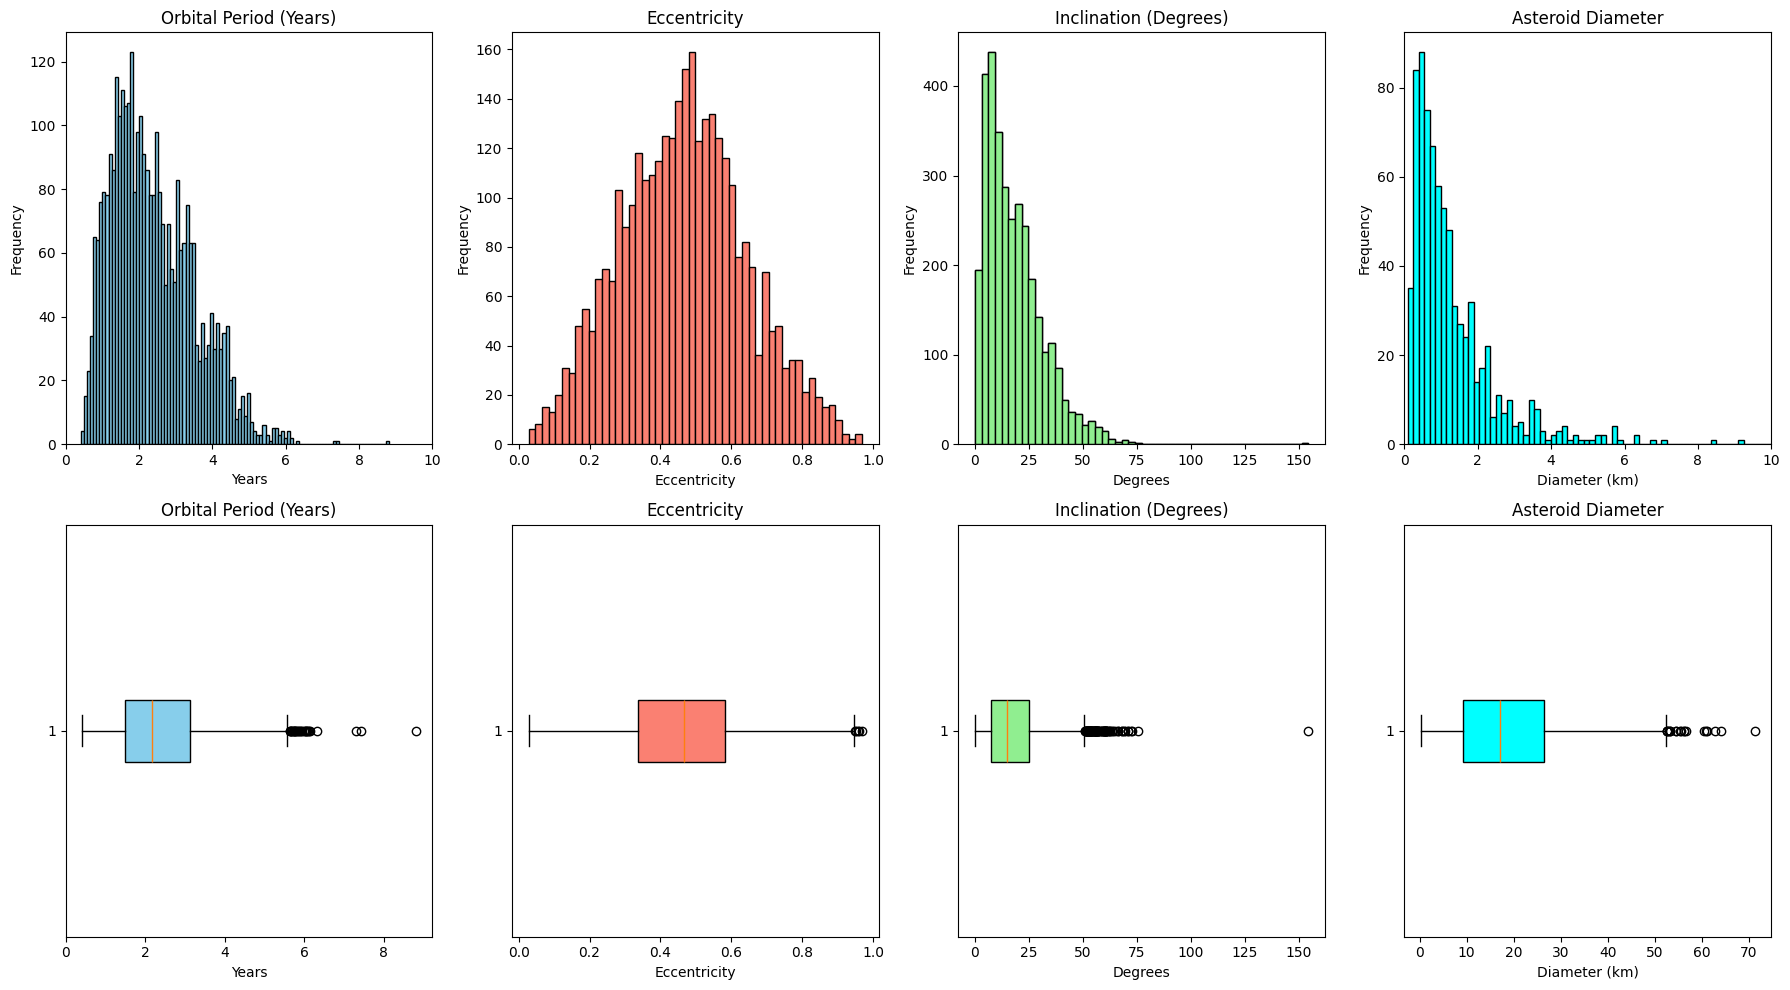

In [39]:
# Set up the visualization environment

fig, ax = plt.subplots(2, 4, figsize=(18, 10))

# Histograms
ax[0, 0].hist(asteroid_data_cleaned['per_y'], bins=100, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Orbital Period (Years)')
ax[0, 0].set_xlabel('Years')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlim(0,10)

ax[0, 1].hist(asteroid_data_cleaned['e'], bins=50, color='salmon', edgecolor='black')
ax[0, 1].set_title('Eccentricity')
ax[0, 1].set_xlabel('Eccentricity')
ax[0, 1].set_ylabel('Frequency')

ax[0, 2].hist(asteroid_data_cleaned['i'], bins=50, color='lightgreen', edgecolor='black')
ax[0, 2].set_title('Inclination (Degrees)')
ax[0, 2].set_xlabel('Degrees')
ax[0, 2].set_ylabel('Frequency')

ax[0, 2].hist(asteroid_data_cleaned['i'], bins=50, color='lightgreen', edgecolor='black')
ax[0, 2].set_title('Inclination (Degrees)')
ax[0, 2].set_xlabel('Degrees')
ax[0, 2].set_ylabel('Frequency')

ax[0, 3].hist(asteroid_data_cleaned_diameter['diameter'], bins=250, color='cyan', edgecolor='black')
ax[0, 3].set_title('Asteroid Diameter')
ax[0, 3].set_xlabel('Diameter (km)')
ax[0, 3].set_ylabel('Frequency')
ax[0, 3].set_xlim(0,10)

# Box plots
ax[1, 0].boxplot(asteroid_data_cleaned['per_y'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax[1, 0].set_title('Orbital Period (Years)')
ax[1, 0].set_xlabel('Years')

ax[1, 1].boxplot(asteroid_data_cleaned['e'], vert=False, patch_artist=True, boxprops=dict(facecolor='salmon'))
ax[1, 1].set_title('Eccentricity')
ax[1, 1].set_xlabel('Eccentricity')

ax[1, 2].boxplot(asteroid_data_cleaned['i'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax[1, 2].set_title('Inclination (Degrees)')
ax[1, 2].set_xlabel('Degrees')

ax[1, 3].boxplot(asteroid_data_cleaned_diameter['i'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan'))
ax[1, 3].set_title('Asteroid Diameter')
ax[1, 3].set_xlabel('Diameter (km)')

# Adjust layout
plt.tight_layout()
plt.show()

    

Now we look at some interesting relationships

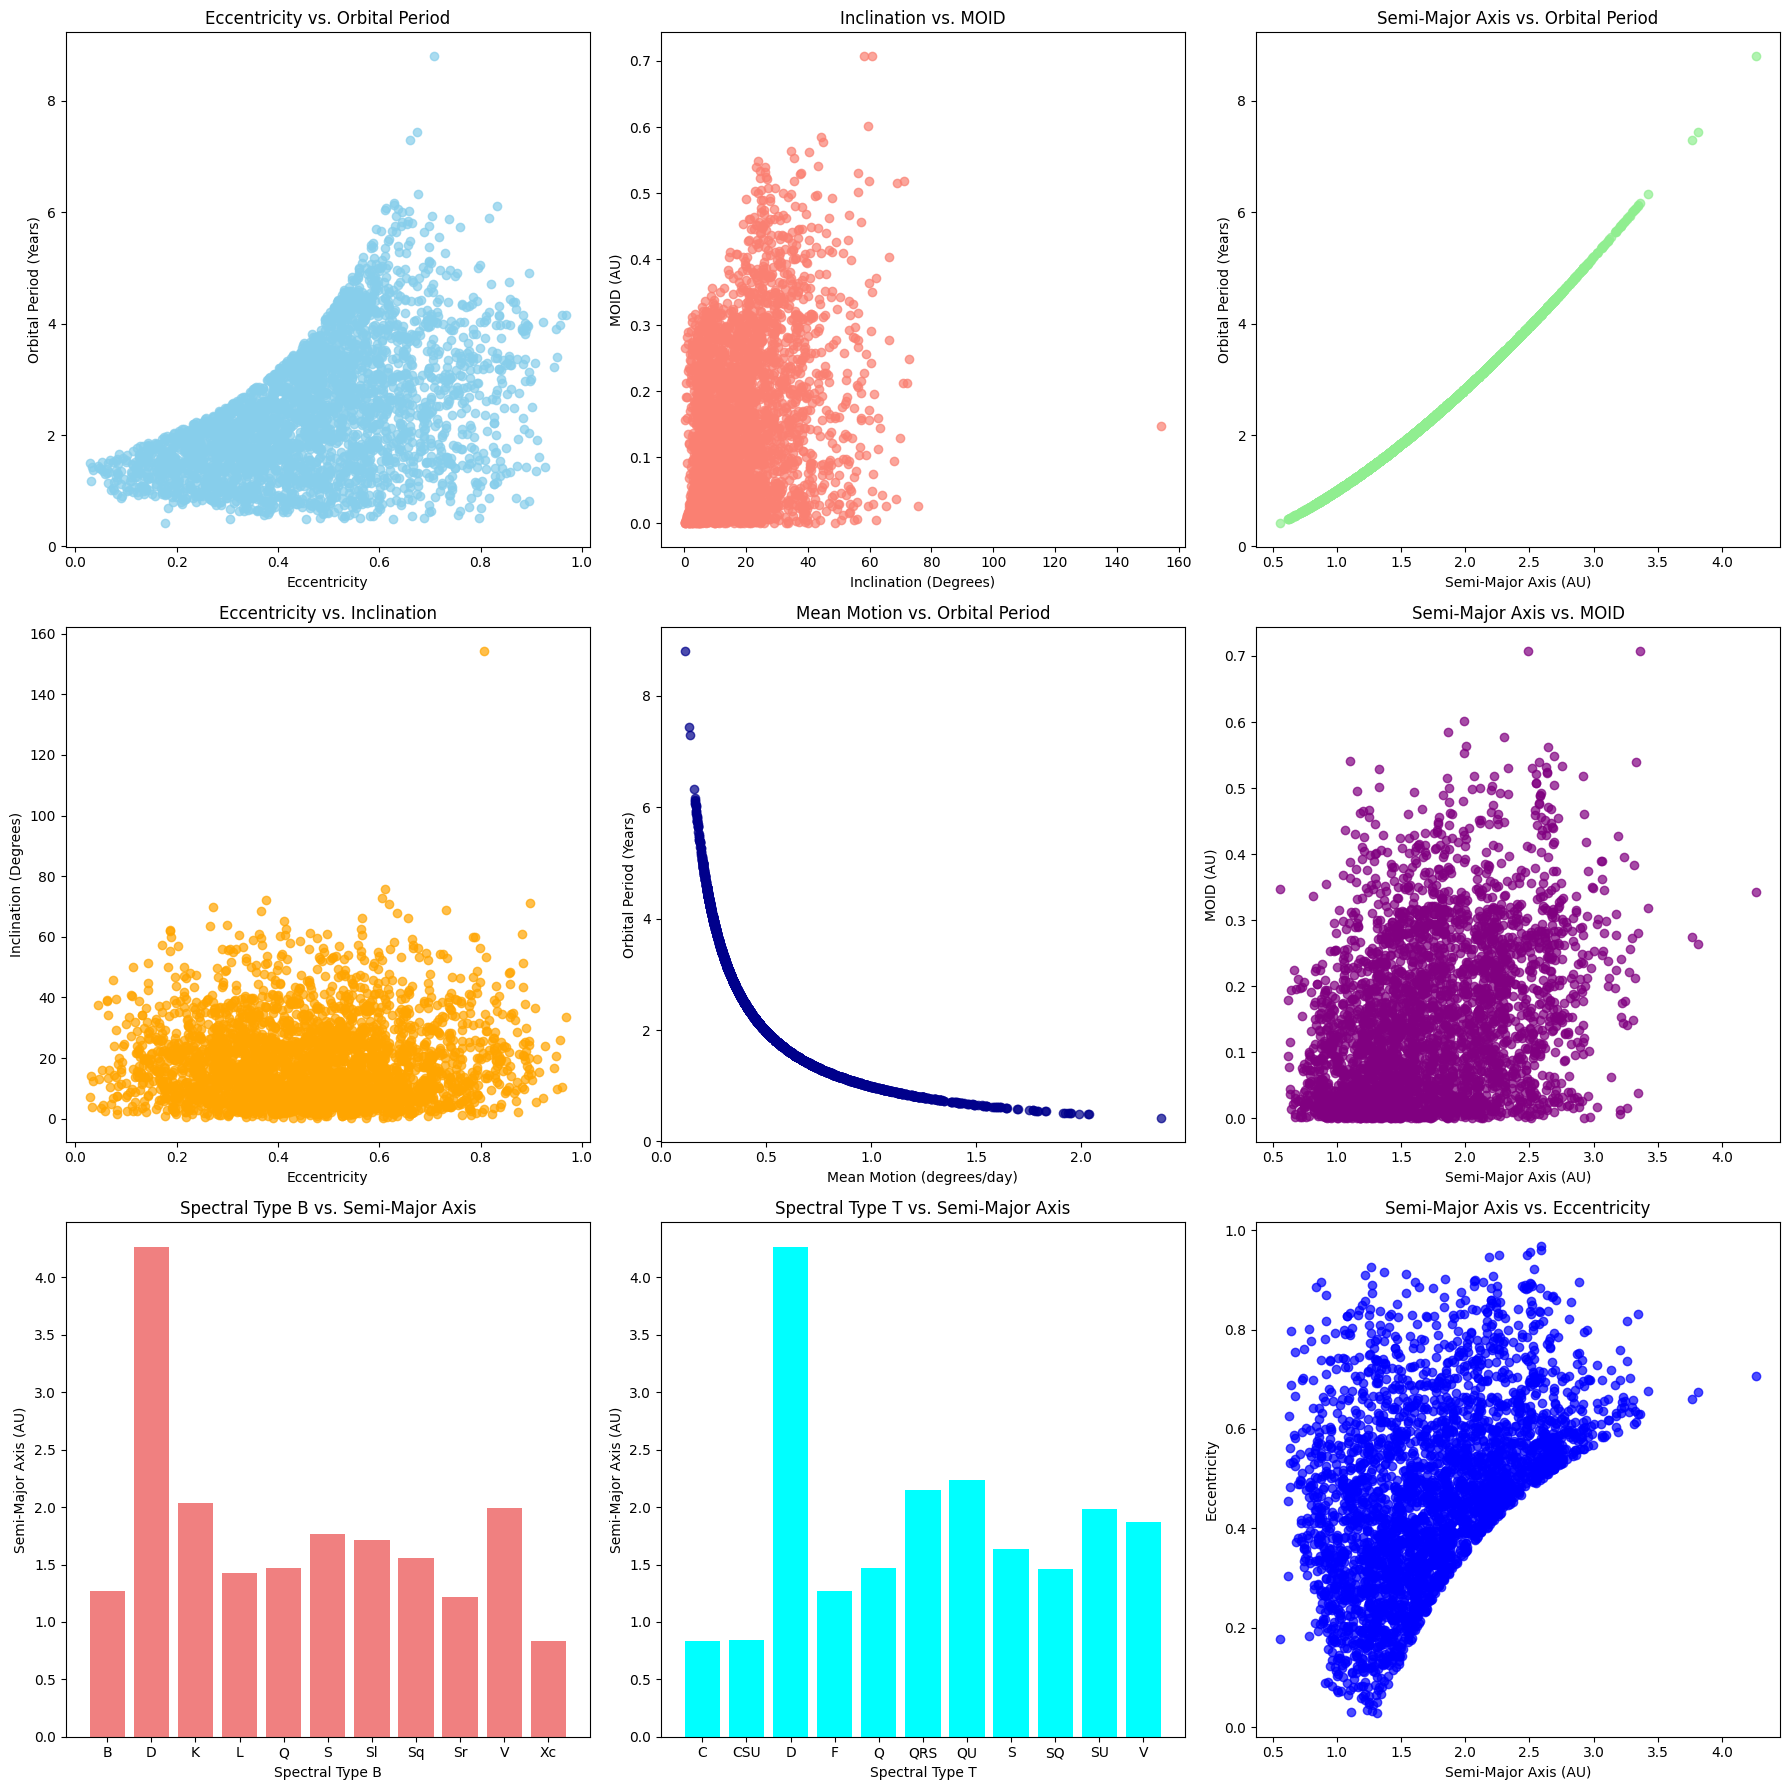

In [40]:
# Creating subplots for a 3x3 grid of scatter plots

fig, ax = plt.subplots(3, 3, figsize=(18, 18))

# Scatter plot 1: Eccentricity vs. Orbital Period
ax[0, 0].scatter(asteroid_data_cleaned['e'], asteroid_data_cleaned['per_y'], alpha=0.7, color='skyblue')
ax[0, 0].set_title('Eccentricity vs. Orbital Period')
ax[0, 0].set_xlabel('Eccentricity')
ax[0, 0].set_ylabel('Orbital Period (Years)')

# Scatter plot 2: Inclination vs. MOID
ax[0, 1].scatter(asteroid_data_cleaned['i'], asteroid_data_cleaned['moid'], alpha=0.7, color='salmon')
ax[0, 1].set_title('Inclination vs. MOID')
ax[0, 1].set_xlabel('Inclination (Degrees)')
ax[0, 1].set_ylabel('MOID (AU)')

# Scatter plot 3: Orbital Period vs. Semi-Major Axis
ax[0, 2].scatter(asteroid_data_cleaned['a'], asteroid_data_cleaned['per_y'], alpha=0.7, color='lightgreen')
ax[0, 2].set_title('Semi-Major Axis vs. Orbital Period')
ax[0, 2].set_xlabel('Semi-Major Axis (AU)')
ax[0, 2].set_ylabel('Orbital Period (Years)')

# Scatter plot 4: Eccentricity vs. Inclination
ax[1, 0].scatter(asteroid_data_cleaned['e'], asteroid_data_cleaned['i'], alpha=0.7, color='orange')
ax[1, 0].set_title('Eccentricity vs. Inclination')
ax[1, 0].set_xlabel('Eccentricity')
ax[1, 0].set_ylabel('Inclination (Degrees)')

# Scatter plot 5: Mean Motion vs. Orbital Period
ax[1, 1].scatter(asteroid_data_cleaned['n'], asteroid_data_cleaned['per_y'], alpha=0.7, color='darkblue')
ax[1, 1].set_title('Mean Motion vs. Orbital Period')
ax[1, 1].set_xlabel('Mean Motion (degrees/day)')
ax[1, 1].set_ylabel('Orbital Period (Years)')

# Scatter plot 6: Semi-Major Axis vs. MOID
ax[1, 2].scatter(asteroid_data_cleaned['a'], asteroid_data_cleaned['moid'], alpha=0.7, color='purple')
ax[1, 2].set_title('Semi-Major Axis vs. MOID')
ax[1, 2].set_xlabel('Semi-Major Axis (AU)')
ax[1, 2].set_ylabel('MOID (AU)')


# Bar plot 7: Spectral Type B vs Semi-major axis (spec_B vs a) for analysis
# Drop rows where 'spec_B', or 'spec_T' are either missing or set to zero
asteroid_data_cleaned_2 = asteroid_data.dropna(subset=['spec_B', 'spec_T']) 
asteroid_data_cleaned_2.loc[:, 'spec_B'] = asteroid_data_cleaned_2['spec_B'].fillna('Unknown')
# Group by 'spec_B' and calculate the mean of 'a' (Semi-Major Axis)
asteroid_data_grouped = asteroid_data_cleaned_2.groupby('spec_B')['a'].mean().reset_index()
# Plotting the bar chart
ax[2, 0].bar(asteroid_data_grouped['spec_B'], asteroid_data_grouped['a'], color='lightcoral')
ax[2, 0].set_title('Spectral Type B vs. Semi-Major Axis')
ax[2, 0].set_xlabel('Spectral Type B')
ax[2, 0].set_ylabel('Semi-Major Axis (AU)')

# Bar plot 8: Spectral Type T vs Semi-major axis (spec_T vs a) for analysis
asteroid_data_cleaned_2.loc[:, 'spec_T'] = asteroid_data_cleaned_2['spec_T'].fillna('Unknown')
# Group by 'spec_B' and calculate the mean of 'a' (Semi-Major Axis)
asteroid_data_grouped = asteroid_data_cleaned_2.groupby('spec_T')['a'].mean().reset_index()
# Plotting the bar chart
ax[2, 1].bar(asteroid_data_grouped['spec_T'], asteroid_data_grouped['a'], color='cyan')
ax[2, 1].set_title('Spectral Type T vs. Semi-Major Axis')
ax[2, 1].set_xlabel('Spectral Type T')
ax[2, 1].set_ylabel('Semi-Major Axis (AU)')


# Scatterplot 9: Semi-Major Axis (a) vs Eccentricity 
ax[2, 2].scatter(asteroid_data_cleaned['a'], asteroid_data_cleaned['e'], alpha=0.7, color='blue')
ax[2, 2].set_title('Semi-Major Axis vs. Eccentricity')
ax[2, 2].set_xlabel('Semi-Major Axis (AU)')
ax[2, 2].set_ylabel('Eccentricity')


# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Display the plot
plt.show()




Analysis complete